# Part I. Define a function - apriori algorithm


Search "customize apriori algorithm (define a function) in python"

In [1]:
# load data
import pandas as pd
from scipy.io import arff

file_path = "/content/vote.arff"
data, meta = arff.loadarff(file_path)

# Convert data to dataframe
df = pd.DataFrame(data)
# again
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
# drop last column
data_vote = df.drop(columns=['Class'])
# compute transcation
transactions = data_vote.apply(lambda row: [col for col in data_vote.columns if row[col] == 'y'], axis=1).tolist()
# print shape of data_vote
print(data_vote.shape)
# check head of data_vote
data_vote.head(3)

(435, 16)


<ipython-input-1-5ac0e81dff4a>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n


In [2]:
# library
from collections import defaultdict
import pandas as pd
import numpy as np
from itertools import combinations
from IPython.display import display

# There are multiple way to do this
# but we consider transaction and minimum support at the beginning.
# similar to the first try (w/o defining a function), find frequent sets.

def apriori_algorithm(transactions, min_support):
    item_counts = defaultdict(int)
    num_transactions = len(transactions)

    # count occurrences
    for transaction in transactions:
        for item in transaction:
            item_counts[frozenset([item])] += 1

    # define frequent sets
    frequent_itemsets = {
        itemset: count / num_transactions
        for itemset, count in item_counts.items()
        if (count / num_transactions) >= min_support}

    k = 2
    current_itemsets = list(frequent_itemsets.keys())

    while current_itemsets:
        candidate_counts = defaultdict(int)

        # find candidate
        candidates = [i.union(j) for i in current_itemsets for j in current_itemsets if len(i.union(j)) == k]
        candidates = list(set(candidates))

        for transaction in transactions:
            for candidate in candidates:
                if candidate.issubset(transaction):
                    candidate_counts[candidate] += 1

        filtered_candidates = {
            itemset: count / num_transactions
            for itemset, count in candidate_counts.items()
            if (count / num_transactions) >= min_support}

        current_itemsets = list(filtered_candidates.keys())

        # update and save frequent sets
        frequent_itemsets.update(filtered_candidates)

        k += 1

    return frequent_itemsets


def association_rules(frequent_itemsets, transactions, min_confidence):
    # similar as above
    num_transactions = len(transactions)
    rules = []

    for itemset in frequent_itemsets.keys():
        if len(itemset) > 1:
            for consequent_size in range(1, len(itemset)):
                for consequent in combinations(itemset, consequent_size):
                    antecedent = itemset.difference(consequent)

                    if antecedent and consequent:
                        antecedent_support = frequent_itemsets.get(frozenset(antecedent), 0)
                        rule_support = frequent_itemsets[itemset]
                        confidence = rule_support / antecedent_support if antecedent_support > 0 else 0

                        if confidence >= min_confidence:
                            rules.append((set(antecedent), set(consequent), rule_support, confidence))

    return rules

In [3]:
#############################
# Using 0.3 as a threshold of minimum support
# we will continue using it in Weka.
threshold_min_support = 0.3
frequent_itemsets = apriori_algorithm(transactions, threshold_min_support)
# print results, need to do convertion
frequent_itemsets_df = pd.DataFrame([(set(itemset), support) for itemset, support in frequent_itemsets.items()], columns=["Itemset", "Support"])
print(f"Total frequent sets: {len(frequent_itemsets)}")
display(frequent_itemsets_df)

Total frequent sets: 160


,Itemset,Support
0,{water-project-cost-sharing},0.558621
1,{physician-fee-freeze},0.406897
2,{el-salvador-aid},0.521839
3,{religious-groups-in-schools},0.650575
4,{immigration},0.512644
...,...,...
155,"{adoption-of-the-budget-resolution, anti-satel...",0.301149
156,"{superfund-right-to-sue, education-spending, c...",0.301149
157,"{superfund-right-to-sue, crime, religious-grou...",0.326437
158,"{adoption-of-the-budget-resolution, export-adm...",0.404598


In [4]:
# Using a threshold of 0.6 (60%) for confidence
threshold_min_confidence = 0.6
association_rules_output = association_rules(frequent_itemsets, transactions, threshold_min_confidence)
association_rules_df = pd.DataFrame(association_rules_output, columns=["Antecedent", "Consequent", "Support", "Confidence"])
# print
print(f"Total association rules: {len(association_rules_output)}")
display(association_rules_df)

Total association rules: 737


,Antecedent,Consequent,Support,Confidence
0,{water-project-cost-sharing},{export-administration-act-south-africa},0.473563,0.847737
1,{superfund-right-to-sue},{religious-groups-in-schools},0.478161,0.888889
2,{religious-groups-in-schools},{superfund-right-to-sue},0.478161,0.734982
3,{superfund-right-to-sue},{water-project-cost-sharing},0.356322,0.662393
4,{water-project-cost-sharing},{superfund-right-to-sue},0.356322,0.637860
...,...,...,...,...
732,"{anti-satellite-test-ban, duty-free-exports}","{adoption-of-the-budget-resolution, export-adm...",0.301149,0.885135
733,"{export-administration-act-south-africa, duty-...","{adoption-of-the-budget-resolution, anti-satel...",0.301149,0.775148
734,"{adoption-of-the-budget-resolution, anti-satel...","{export-administration-act-south-africa, aid-t...",0.301149,0.617925
735,"{adoption-of-the-budget-resolution, duty-free-...","{anti-satellite-test-ban, export-administratio...",0.301149,0.856209


# Part II. Plot

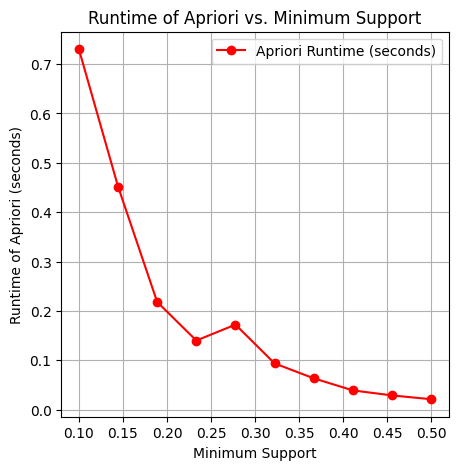

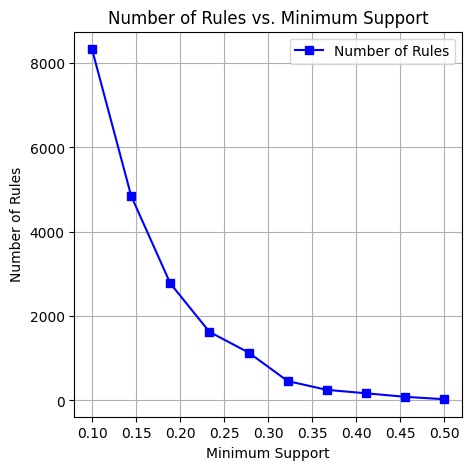

In [5]:
import time
import matplotlib.pyplot as plt

# Using practice code, define min_support
min_support_fun = np.linspace(0.1, 0.5, 10)
runtimes = []
num_rule = []

# loop for plot
for min_support in min_support_fun:
    start_time = time.time()
    # find frequent sets
    frequent_itemsets_test = apriori_algorithm(transactions, min_support) # corresponding to function
    # find association rules
    rules_test = association_rules(frequent_itemsets_test, transactions, threshold_min_confidence)

    # End
    end_time = time.time()

    # Save output
    runtimes.append(end_time - start_time)
    num_rule.append(len(rules_test))

###########################################
# plot
# Use min_support_fun instead of min_support for plotting
plt.figure(figsize=(5, 5))
plt.plot(min_support_fun, runtimes, marker='o', linestyle='-', color="r", label="Apriori Runtime (seconds)")
plt.xlabel("Minimum Support")
plt.ylabel("Runtime of Apriori (seconds)")
plt.title("Runtime of Apriori vs. Minimum Support")
plt.legend()
plt.grid()
plt.show()

# continue - plot Apriori algorithm and number of rules
plt.figure(figsize=(5, 5))
# Use min_support_fun instead of min_support for plotting
plt.plot(min_support_fun, num_rule, marker='s', linestyle='-', color="b", label="Number of Rules")
plt.xlabel("Minimum Support")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Minimum Support")
plt.legend()
plt.grid()
plt.show()